In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
df = pd.read_csv('marine.csv')
df

,ABUNDANCE,BIOMAS,GENUS_SPECIES,SAMPLE_DESC,PLOT,LATITUDE,LONGITUDE,DAY,MONTH,YEAR
0,1.520,0,Acanthoica aculeata,1996_Prime_901,Prime_901,59.1450,-20.3240,21,6,1996
1,2.280,0,Acanthoica aculeata,1996_Prime_906,Prime_906,59.1350,-20.0980,22,6,1996
2,1.500,0,Acanthoica aculeata,1996_Prime_923,Prime_923,59.0798,-20.4360,25,6,1996
3,3.026,0,Acanthoica aculeata,1996_Prime_924,Prime_924,59.0798,-20.4360,25,6,1996
4,0.080,0,Acanthoica quattrospina,1995_AMT1_11,AMT1_11,33.5972,-20.8778,30,9,1995
...,...,...,...,...,...,...,...,...,...,...
37519,0.020,0,Zygabikodinium,1999_l4_636,l4_636,50.2500,-4.2170,2,8,1999
37520,0.040,0,Zygabikodinium,1999_l4_641,l4_641,50.2500,-4.2170,6,9,1999
37521,0.020,0,Zygabikodinium,1999_l4_642,l4_642,50.2500,-4.2170,13,9,1999
37522,0.020,0,Zygabikodinium,1996_Prime_883,Prime_883,59.1700,-20.0000,18,6,1996


In [95]:
df['GENUS_SPECIES'] = df['GENUS_SPECIES'].str.lower()
df['GENUS_SPECIES'].value_counts()

GENUS_SPECIES
flagellate sp4                 920
strombidium                    902
dinoflagellate                 902
emiliania huxleyi              701
flagellate sp7                 683
                              ... 
pseudonitzschia subcurvata       1
manguinea                        1
chaetoceros septentrionalis      1
pseudonitzschia pungens          1
coscinodiscus argus              1
Name: count, Length: 576, dtype: int64

In [96]:
df['date'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-' + df['DAY'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df['rounded-date'] = df['date'].dt.to_period('W').dt.to_timestamp()
df

,ABUNDANCE,BIOMAS,GENUS_SPECIES,SAMPLE_DESC,PLOT,LATITUDE,LONGITUDE,DAY,MONTH,YEAR,date,rounded-date
10675,0.050955,0,distephanus speculum,1992_l4_367,l4_367,50.25,-4.217,12,10,1992,1992-10-12,1992-10-12
28688,0.161404,0,protoperidinium bipes,1992_l4_367,l4_367,50.25,-4.217,12,10,1992,1992-10-12,1992-10-12
33243,2.431010,0,strombidium,1992_l4_367,l4_367,50.25,-4.217,12,10,1992,1992-10-12,1992-10-12
20492,0.040000,0,leptocylindrus danicus,1992_l4_367,l4_367,50.25,-4.217,12,10,1992,1992-10-12,1992-10-12
13992,1046.880000,0,flagellate sp7,1992_l4_367,l4_367,50.25,-4.217,12,10,1992,1992-10-12,1992-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
22820,68.085000,0,nanoneis hasleae,2002_Irmingen_773,Irmingen_773,61.16,-25.434,22,5,2002,2002-05-22,2002-05-20
9942,0.020000,0,dinophysis acuta,2002_Irmingen_773,Irmingen_773,61.16,-25.434,22,5,2002,2002-05-22,2002-05-20
26068,19.130000,0,phaeocystis,2002_Irmingen_773,Irmingen_773,61.16,-25.434,22,5,2002,2002-05-22,2002-05-20
31019,0.440000,0,rhizosolenia imbricata,2002_Irmingen_773,Irmingen_773,61.16,-25.434,22,5,2002,2002-05-22,2002-05-20


In [97]:
dia = df.loc[df['GENUS_SPECIES'] == 'dinoflagellate', ['ABUNDANCE', 'BIOMAS', 'date', 'rounded-date']].reset_index().drop(columns=['index'])

<Axes: >

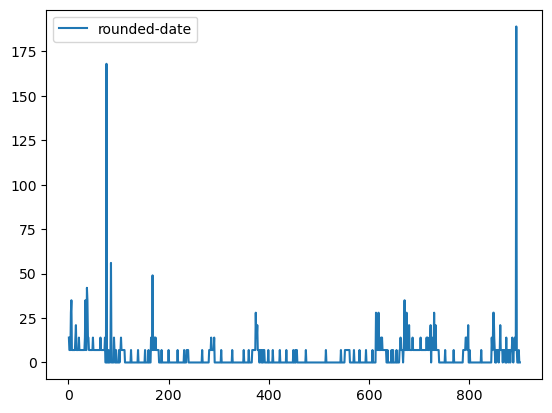

In [98]:
diffs = dia['rounded-date'].diff().reset_index().drop(columns = ['index']).apply(lambda val: val.dt.days, axis = 1)
dia.loc[:, 'diffs'] = diffs.values
diffs.plot()

In [99]:
dia

,ABUNDANCE,BIOMAS,date,rounded-date,diffs
0,30.985700,0,1992-10-12,1992-10-12,NaN
1,61.921400,0,1992-10-26,1992-10-26,14.0
2,0.064885,0,1992-11-03,1992-11-02,7.0
3,110.169000,0,1992-11-10,1992-11-09,7.0
4,61.920000,0,1992-11-16,1992-11-16,7.0
...,...,...,...,...,...
897,6.080000,0,2002-05-18,2002-05-13,0.0
898,6.460000,0,2002-05-19,2002-05-13,0.0
899,32.300000,0,2002-05-20,2002-05-20,7.0
900,1.600000,0,2002-05-21,2002-05-20,0.0


In [100]:
grouped = dia.groupby(by = 'rounded-date').mean()[['ABUNDANCE', 'BIOMAS']].reset_index()

In [101]:
grouped

,rounded-date,ABUNDANCE,BIOMAS
0,1992-10-12,30.985700,0.0
1,1992-10-26,61.921400,0.0
2,1992-11-02,0.064885,0.0
3,1992-11-09,110.169000,0.0
4,1992-11-16,61.920000,0.0
...,...,...,...
334,2001-10-22,16.090000,0.0
335,2001-10-29,62.920000,0.0
336,2002-05-06,1.360000,0.0
337,2002-05-13,10.925000,0.0


In [102]:
grouped['diff'] = grouped['rounded-date'].diff().dt.days
grouped[grouped['diff'] > 150]

,rounded-date,ABUNDANCE,BIOMAS,diff
74,1995-03-27,1.00,0.0,168.0
336,2002-05-06,1.36,0.0,189.0


In [103]:
trunced = grouped[(grouped['rounded-date'] >= '1995-03-27') & (grouped['rounded-date'] < '2002-05-06')]
trunced

,rounded-date,ABUNDANCE,BIOMAS,diff
74,1995-03-27,1.000000,0.0,168.0
75,1995-04-03,0.220000,0.0,7.0
76,1995-04-10,0.080000,0.0,7.0
77,1995-06-05,10.433333,0.0,56.0
78,1995-06-19,138.490000,0.0,14.0
...,...,...,...,...
331,2001-09-17,106.150000,0.0,7.0
332,2001-09-24,30.340000,0.0,7.0
333,2001-10-08,2.240000,0.0,14.0
334,2001-10-22,16.090000,0.0,14.0


In [104]:
full_range = set(pd.date_range(start=trunced['rounded-date'].min(), end=trunced['rounded-date'].max(), freq='7D'))  # 'MS' = Month Start
existing = set(trunced['rounded-date'])

In [105]:
nans = pd.DataFrame({'rounded-date': list(full_range.difference(existing)), 'ABUNDANCE': np.nan, 'BIOMAS': np.nan})
nans

,rounded-date,ABUNDANCE,BIOMAS
0,2001-04-09,NaN,NaN
1,1995-04-17,NaN,NaN
2,1999-12-20,NaN,NaN
3,1995-04-24,NaN,NaN
4,1998-11-09,NaN,NaN
...,...,...,...
78,1997-01-13,NaN,NaN
79,2000-11-27,NaN,NaN
80,1999-12-06,NaN,NaN
81,1999-10-18,NaN,NaN


In [106]:
final = pd.concat([trunced, nans]).sort_values(by='rounded-date')[['rounded-date', 'ABUNDANCE']].reset_index().drop(columns=['index'])
final

,rounded-date,ABUNDANCE
0,1995-03-27,1.00
1,1995-04-03,0.22
2,1995-04-10,0.08
3,1995-04-17,NaN
4,1995-04-24,NaN
...,...,...
340,2001-10-01,NaN
341,2001-10-08,2.24
342,2001-10-15,NaN
343,2001-10-22,16.09


In [107]:
final.to_csv('marine-dinoflagellate.csv')